In [36]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error,mean_squared_error, accuracy_score,r2_score

In [113]:
df=pd.read_csv(r'C:\Melbourne_Escooter\RealDataset\FinalResults\SA1\Features-trips\Final\final version\DATASET.csv')

In [114]:
column=['SA1_CODE21']
df=df.drop(column, axis=1)

In [115]:
scale= StandardScaler()

In [116]:
df_sc= scale.fit_transform(df)
df_sc=pd.DataFrame(df_sc, columns=df.columns)

In [117]:
df.columns

Index(['tripDensity', 'date', 'hour', 'rainfall', 'min_temp', 'trainDensity',
       'busDensity', 'tramDensity', 'Cafe perc', 'Office perc', 'Shops perc',
       'mxi', 'recreationCount', 'campusCount', 'female%', 'male%',
       'populationDensity', '5_14', '15_29', '30_39', '40_49'],
      dtype='object')

In [118]:
y=df_sc['tripDensity']
X=df_sc.drop(['tripDensity'], axis=1)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=24)

In [120]:
print(X_train.shape)

(45830, 20)


In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [128]:
model=Sequential()

In [129]:
model.add(Dense(units=14, input_dim=20,kernel_initializer='normal',activation='relu'))

In [130]:
model.add(Dense(units=14, kernel_initializer='normal',activation='tanh'))

In [131]:
model.add(Dense(1, kernel_initializer='normal'))

In [132]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [133]:
model.fit(X_train, y_train, batch_size=30, epochs=40, verbose=1)

Epoch 1/40
45830/45830 [==============================] - 4s 88us/sample - loss: 0.9316
Epoch 2/40
45830/45830 [==============================] - 3s 61us/sample - loss: 0.91141s - los
Epoch 3/40
45830/45830 [==============================] - 3s 62us/sample - loss: 0.90481s -
Epoch 4/40
45830/45830 [==============================] - 3s 60us/sample - loss: 0.9011
Epoch 5/40
45830/45830 [==============================] - 3s 67us/sample - loss: 0.9008
Epoch 6/40
45830/45830 [==============================] - 3s 58us/sample - loss: 0.8966
Epoch 7/40
45830/45830 [==============================] - 3s 64us/sample - loss: 0.8959
Epoch 8/40
45830/45830 [==============================] - 3s 61us/sample - loss: 0.8921
Epoch 9/40
45830/45830 [==============================] - 3s 68us/sample - loss: 0.8893
Epoch 10/40
45830/45830 [==============================] - 3s 65us/sample - loss: 0.8901
Epoch 11/40
45830/45830 [==============================] - 3s 63us/sample - loss: 0.88750s
Epoch 12/40
4583

In [111]:
model.predict(X_test)

array([[-0.41932654],
       [-0.26911128],
       [-0.2592455 ],
       ...,
       [-0.18386877],
       [-0.26302707],
       [-0.27661988]], dtype=float32)

In [134]:
r2_score(y_test,model.predict(X_test))

0.16453933515487973

In [135]:
print("MAE %f" %mean_absolute_error(y_test,model.predict(X_test)))

MAE 0.368380


In [38]:
###### tuning params

In [94]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    batch_size_list=[30,40,50]
    epoch_list=[30,40,50]
    unit_list=[10,12,14]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'MAE'])
    
    TrailNum=0
    for batch_size_trial in batch_size_list:
        for epoch_trial in epoch_list:
            for unit_trial in unit_list:
                TrailNum+=1
                model=Sequential()
                model.add(Dense(units=unit_trial, input_dim=20,kernel_initializer='normal',activation='relu'))
                model.add(Dense(units=unit_trial, kernel_initializer='normal',activation='relu'))
                model.add(Dense(1, kernel_initializer='normal'))
                model.compile(loss='mean_squared_error', optimizer='adam')
                model.fit(X_train, y_train, batch_size=batch_size_trial, epochs=epoch_trial, verbose=0)
                #y_test=y_test.to_numpy()
                MAPE = r2_score(y_test,model.predict(X_test))
                print(TrailNum, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epoch_trial, 'R2:', MAPE)
                SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrailNum, str(unit_trial)+'-'+str(batch_size_trial)+'-'+str(epoch_trial), MAPE]],columns=['TrialNumber', 'Parameters', 'MAE'] ))
    return(SearchResultsData)

In [95]:
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 30 - epochs: 30 R2: 0.17686423666173556
2 Parameters: batch_size: 30 - epochs: 30 R2: 0.17439818897824877
3 Parameters: batch_size: 30 - epochs: 30 R2: 0.18564119180658067
4 Parameters: batch_size: 30 - epochs: 40 R2: 0.17375577912429152
5 Parameters: batch_size: 30 - epochs: 40 R2: 0.17321365024858792
6 Parameters: batch_size: 30 - epochs: 40 R2: 0.19621709288193556
7 Parameters: batch_size: 30 - epochs: 50 R2: 0.1869466015486866
8 Parameters: batch_size: 30 - epochs: 50 R2: 0.18255960912459002
9 Parameters: batch_size: 30 - epochs: 50 R2: 0.18509444749581805
10 Parameters: batch_size: 40 - epochs: 30 R2: 0.16509989543038228
11 Parameters: batch_size: 40 - epochs: 30 R2: 0.18073645782523595
12 Parameters: batch_size: 40 - epochs: 30 R2: 0.19004382203412928
13 Parameters: batch_size: 40 - epochs: 40 R2: 0.17858481343158172
14 Parameters: batch_size: 40 - epochs: 40 R2: 0.17700806786674939
15 Parameters: batch_size: 40 - epochs: 40 R2: 0.17445005883304587
16 Pa

<AxesSubplot:xlabel='Parameters'>

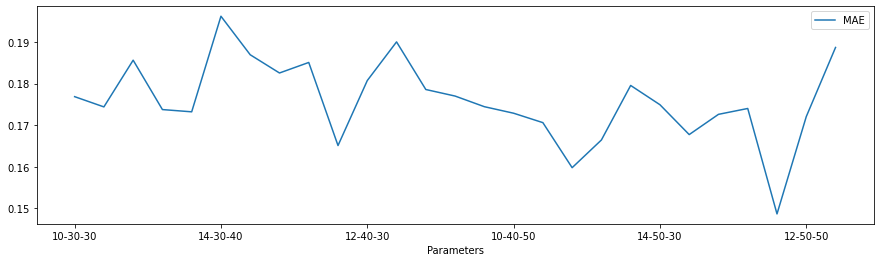

In [96]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='MAE', figsize=(15,4), kind='line')